Analisis de Ventas

1.- Preparando los datos

Importando librerias y data frame

In [56]:
import pandas as pd 
import matplotlib.pyplot as plt

from itertools import combinations
from collections import Counter

In [33]:
df = pd.read_csv('Ventas_Totales_2019.csv')
df.head()

,OrderID,Product,Quantity Ordered,Price,Order Date,Purchase Adress
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"""9 Lake St, New York City, NY 10001"""
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"""760 Church St, San Francisco, CA 94016"""
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"""735 5th St, New York City, NY 10001"""
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"""75 Jackson St, Dallas, TX 75001"""
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"""943 2nd St, Atlanta, GA 30301"""


Convirtiendo las columnas al tipo de dato correcto

In [34]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']) #Hacerlo int
df['Price'] = pd.to_numeric(df['Price']) #Hacerlo float

Agregando una columana de Ventas 

In [35]:
df["Sales"] = df['Quantity Ordered'] * df['Price']
df.head()

,OrderID,Product,Quantity Ordered,Price,Order Date,Purchase Adress,Sales
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"""9 Lake St, New York City, NY 10001""",11.99
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"""760 Church St, San Francisco, CA 94016""",11.95
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"""735 5th St, New York City, NY 10001""",150.00
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"""75 Jackson St, Dallas, TX 75001""",2.99
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"""943 2nd St, Atlanta, GA 30301""",23.90


Agregando una columna para el Mes

In [36]:
df["Month"] = df['Order Date'].str[0:2]
df["Month"] = df['Month'].astype('int')
df.head()

,OrderID,Product,Quantity Ordered,Price,Order Date,Purchase Adress,Sales,Month
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"""9 Lake St, New York City, NY 10001""",11.99,1
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"""760 Church St, San Francisco, CA 94016""",11.95,1
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"""735 5th St, New York City, NY 10001""",150.00,1
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"""75 Jackson St, Dallas, TX 75001""",2.99,1
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"""943 2nd St, Atlanta, GA 30301""",23.90,1


Agregando una columna para Ciudad

In [37]:
df['City'] = df['Purchase Adress'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])
df.head()

,OrderID,Product,Quantity Ordered,Price,Order Date,Purchase Adress,Sales,Month,City
0,147268,Wired Headphones,1,11.99,01/01/19 03:07,"""9 Lake St, New York City, NY 10001""",11.99,1,New York City NY
1,148041,USB-C Charging Cable,1,11.95,01/01/19 03:40,"""760 Church St, San Francisco, CA 94016""",11.95,1,San Francisco CA
2,149343,Apple Airpods Headphones,1,150.00,01/01/19 04:56,"""735 5th St, New York City, NY 10001""",150.00,1,New York City NY
3,149964,AAA Batteries (4-pack),1,2.99,01/01/19 05:53,"""75 Jackson St, Dallas, TX 75001""",2.99,1,Dallas TX
4,149350,USB-C Charging Cable,2,11.95,01/01/19 06:03,"""943 2nd St, Atlanta, GA 30301""",23.90,1,Atlanta GA


Agregando columna de Hora

In [43]:
df['Order Date'] = pd.to_datetime(df["Order Date"])

C:\Users\danyl\AppData\Local\Temp\ipykernel_15528\1134126591.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df["Order Date"])


In [44]:
df['Hour'] = df['Order Date'].dt.hour
df.head()

,OrderID,Product,Quantity Ordered,Price,Order Date,Purchase Adress,Sales,Month,City,Hour
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"""9 Lake St, New York City, NY 10001""",11.99,1,New York City NY,3
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"""760 Church St, San Francisco, CA 94016""",11.95,1,San Francisco CA,3
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"""735 5th St, New York City, NY 10001""",150.00,1,New York City NY,4
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"""75 Jackson St, Dallas, TX 75001""",2.99,1,Dallas TX,5
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"""943 2nd St, Atlanta, GA 30301""",23.90,1,Atlanta GA,6


2.- Contestando preguntas de interes

Que mes tuvo mejores ventas? Cuanto se gano en ese mes?

In [38]:
ventas_mes = df.groupby('Month').sum()

Text(0.5, 0, 'Meses')

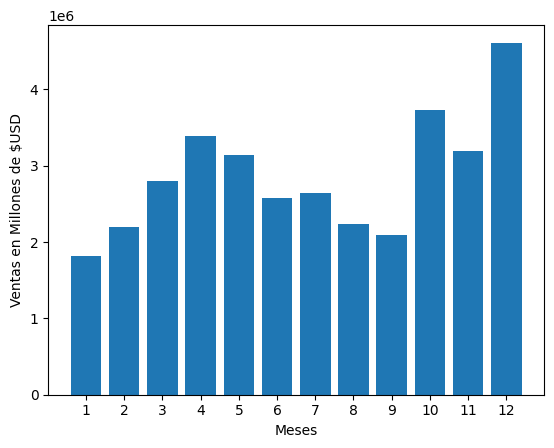

In [39]:
mes = range(1,13)
plt.bar(mes, ventas_mes['Sales'])
plt.xticks(mes)
plt.ylabel('Ventas en Millones de $USD')
plt.xlabel('Meses')

Que cuidad tuvo el mayor numero de ventas?

In [40]:
ventas_ciudad = df.groupby('City').sum()

Text(0.5, 0, 'Cuidades')

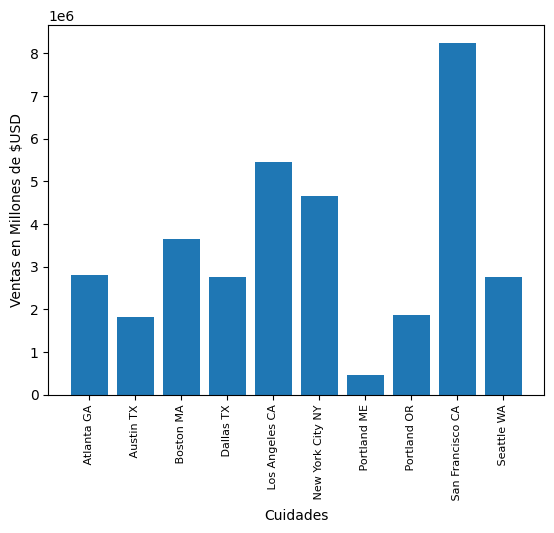

In [41]:
cuidad = [ciudad for ciudad, d in df.groupby('City')]

plt.bar(cuidad, ventas_ciudad['Sales'])
plt.xticks(cuidad, rotation = 'vertical', size = 8)
plt.ylabel('Ventas en Millones de $USD')
plt.xlabel('Cuidades')

A que hora seria recomendable mostrar aununcios?

Text(0.5, 0, 'Horas')

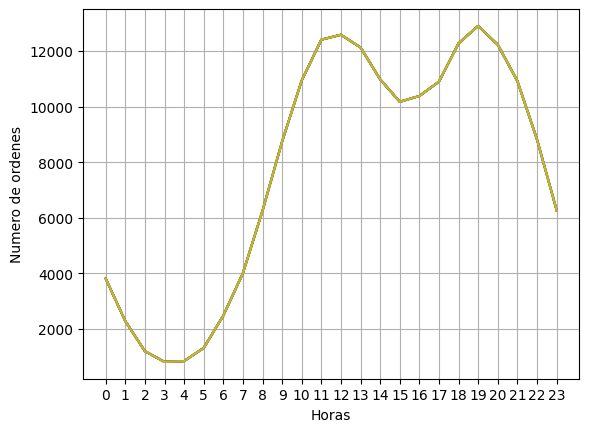

In [45]:
horas = [hora for hora, d in df.groupby('Hour')]

plt.plot(horas, df.groupby(['Hour']).count())
plt.xticks(horas)
plt.grid()
plt.ylabel('Numero de ordenes')
plt.xlabel('Horas')

#Seria recomendable mostrar anuncios entre las 10am y las 12pm o entre las 6pm y las 8pm

Que productos se suelen vender juntos?

In [55]:
dup = df[df['OrderID'].duplicated(keep=False)]

dup['Grouped'] = dup.groupby('OrderID')['Product'].transform(lambda x: ','.join(x))

dup = dup[["OrderID", "Grouped"]].drop_duplicates()

dup.head(10)

C:\Users\danyl\AppData\Local\Temp\ipykernel_15528\2558567495.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup['Grouped'] = dup.groupby('OrderID')['Product'].transform(lambda x: ','.join(x))


,OrderID,Grouped
11,144804,"iPhone,Wired Headphones"
65,148074,"Google Phone,USB-C Charging Cable"
79,148450,"iPhone,Lightning Charging Cable"
92,144679,"Google Phone,USB-C Charging Cable"
94,147451,"Google Phone,Wired Headphones"
108,143738,"iPhone,Lightning Charging Cable"
115,142112,"20in Monitor,Bose SoundSport Headphones"
123,147198,"Google Phone,USB-C Charging Cable"
138,150335,"iPhone,Apple Airpods Headphones"
140,142350,"iPhone,Wired Headphones"


In [58]:
count = Counter()

for row in dup['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1003),
 (('Google Phone', 'USB-C Charging Cable'), 985),
 (('iPhone', 'Wired Headphones'), 445),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 357),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 91)]

Que productos son los que mas se venden? Por que?

In [68]:
df.head()

,OrderID,Product,Quantity Ordered,Price,Order Date,Purchase Adress,Sales,Month,City,Hour
0,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"""9 Lake St, New York City, NY 10001""",11.99,1,New York City NY,3
1,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"""760 Church St, San Francisco, CA 94016""",11.95,1,San Francisco CA,3
2,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"""735 5th St, New York City, NY 10001""",150.00,1,New York City NY,4
3,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"""75 Jackson St, Dallas, TX 75001""",2.99,1,Dallas TX,5
4,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"""943 2nd St, Atlanta, GA 30301""",23.90,1,Atlanta GA,6


In [77]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, d in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

TypeError: datetime64 type does not support sum operations

In [76]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

TypeError: agg function failed [how->mean,dtype->object]